In [51]:
# at this stage in the book we haven't actually installed matplotlib,
# comment this out if you need to
# Adding connector
from matplotlib import pyplot as plt
from collections import Counter

##########################
#                        #
# FINDING KEY CONNECTORS #
#                        #
##########################

users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" },
    { "id": 10, "name": "Jen" }
]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


# first give each user an empty list
for user in users:
    user["friends"] = []

# and then populate the lists with friendships
for i, j in friendships:
    # this works because users[i] is the user whose id is i
    users[i]["friends"].append(users[j]) # add i as a friend of j
    users[j]["friends"].append(users[i]) # add j as a friend of i

def number_of_friends(user):
    """how many friends does _user_ have?"""
    return len(user["friends"]) # length of friend_ids list

total_connections = sum(number_of_friends(user)
                        for user in users) # 24

num_users = len(users)
avg_connections = total_connections / num_users # 2.4

################################
#                              #
# DATA SCIENTISTS YOU MAY KNOW #
#                              #
################################

def friends_of_friend_ids_bad(user):
    # "foaf" is short for "friend of a friend"
    return [foaf["id"]
            for friend in user["friends"] # for each of user's friends
            for foaf in friend["friends"]] # get each of _their_ friends

from collections import Counter # not loaded by default

def not_the_same(user, other_user):
    """two users are not the same if they have different ids"""
    return user["id"] != other_user["id"]

def not_friends(user, other_user):
    """other_user is not a friend if he's not in user["friends"];
    that is, if he's not_the_same as all the people in user["friends"]"""
    return all(not_the_same(friend, other_user)
               for friend in user["friends"])

def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                   for friend in user["friends"]  # for each of my friends
                   for foaf in friend["friends"]  # count *their* friends
                   if not_the_same(user, foaf)    # who aren't me
                   and not_friends(user, foaf))   # and aren't my friends

print(friends_of_friend_ids(users[3])) # Counter({0: 2, 5: 1})

interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

from collections import defaultdict

# keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

# keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

def most_common_interests_with(user_id):
    return Counter(interested_user_id
        for interest in interests_by_user_id["user_id"]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user_id)

###########################
#                         #
# SALARIES AND EXPERIENCE #
#                         #
###########################

salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

def make_chart_salaries_by_tenure():
    tenures = [tenure for salary, tenure in salaries_and_tenures]
    salaries = [salary for salary, tenure in salaries_and_tenures]
    plt.scatter(tenures, salaries)
    plt.xlabel("Years Experience")
    plt.ylabel("Salary")
    plt.show()

# keys are years
# values are the salaries for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

def tenure_bucket(tenure):
    if tenure < 2: return "less than two"
    elif tenure < 5: return "between two and five"
    else: return "more than five"

salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

average_salary_by_bucket = {
  tenure_bucket : sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}


#################
#               #
# PAID_ACCOUNTS #
#               #
#################

def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0: return "paid"
    elif years_experience < 8.5: return "unpaid"
    else: return "paid"

######################
#                    #
# TOPICS OF INTEREST #
#                    #
######################

words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())


if __name__ == "__main__":

    print()
    print("######################")
    print("#")
    print("# FINDING KEY CONNECTORS")
    print("#")
    print("######################")
    print()


    print("total connections", total_connections)
    print("number of users", num_users)
    print("average connections", total_connections / num_users)
    print()

    # create a list (user_id, number_of_friends)
    num_friends_by_id = [(user["id"], number_of_friends(user))
                         for user in users]

    print("users sorted by number of friends:")
    print(sorted(num_friends_by_id,
                 key=lambda pair: pair[1],                       # by number of friends
                 reverse=True))                                  # largest to smallest

    print()
    print("######################")
    print("#")
    print("# DATA SCIENTISTS YOU MAY KNOW")
    print("#")
    print("######################")
    print()


    print("friends of friends bad for user 0:", friends_of_friend_ids_bad(users[0]))
    print("friends of friends for user 3:", friends_of_friend_ids(users[3]))

    print()
    print("######################")
    print("#")
    print("# SALARIES AND TENURES")
    print("#")
    print("######################")
    print()

    print("average salary by tenure", average_salary_by_tenure)
    print("average salary by tenure bucket", average_salary_by_bucket)

    print()
    print("######################")
    print("#")
    print("# MOST COMMON WORDS")
    print("#")
    print("######################")
    print()

    for word, count in words_and_counts.most_common():
        if count > 1:
            print(word, count)


Counter({0: 2, 5: 1})

######################
#
# FINDING KEY CONNECTORS
#
######################

total connections 24
number of users 11
average connections 2.1818181818181817

users sorted by number of friends:
[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1), (10, 0)]

######################
#
# DATA SCIENTISTS YOU MAY KNOW
#
######################

friends of friends bad for user 0: [0, 2, 3, 0, 1, 3]
friends of friends for user 3: Counter({0: 2, 5: 1})

######################
#
# SALARIES AND TENURES
#
######################

average salary by tenure {8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}
average salary by tenure bucket {'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}

######################
#
# MOST COMMON WORDS
#
######################

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 

# MATPLOTLIB

In [30]:
import matplotlib.pyplot as plt

### Line Chart
Line charts visualize change over a continuous range, such as time or distance.  
Visualizing change with a line chart allows for the overall trend to be displayed at once and for multiple trends to be compared simultaneously.  
Line charts are made up of a continuous date or number on the x-axis, and an associated numeric value on the y-axis.

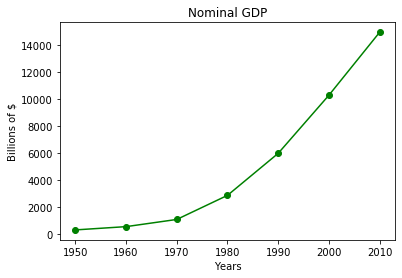

In [34]:
# Line Chart of gdp by years
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
#plt.plot(x, y, color='green', marker='o', linestyle='solid')
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title("Nominal GDP")

# add a label to the y-axis
plt.xlabel("Years")
plt.ylabel("Billions of $")
plt.show()

### Bar Chart
Bar charts summarize and compare categorical data using proportional bar lengths to represent values.  
The x-axis represents discrete categories (category or dates) that correspond to one or many bars. Each bar’s height corresponds to a numeric value, which is measured by the y-axis.

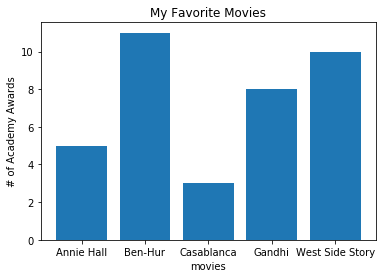

In [42]:
# Normal Bar Chart
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(movies,num_oscars)
plt.xlabel('movies')
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

# label x-axis with movie names at bar centers
plt.xticks(movies)

plt.show()

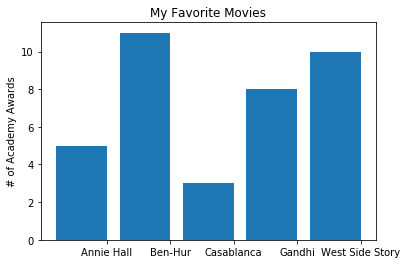

In [46]:
# Bar chart with tick markers shifted to the left
ovies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# bars are by default width 0.8, so we'll add 0.1 to the left coordinates
# so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(movies)]

# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

# label x-axis with movie names at bar centers
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)

plt.show()

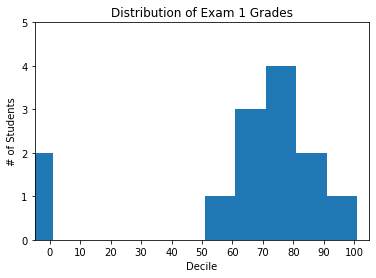

In [81]:
# Histogram with shift
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)

plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
        histogram.values(),                # give each bar its correct height
        10)                                 # give each bar a width of 8
plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

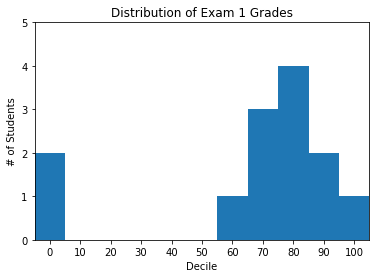

In [82]:
# Histogram without the shift
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)

plt.bar(histogram.keys(), # shift each bar to the left by 4
        histogram.values(),                # give each bar its correct height
        10)                                 # give each bar a width of 8
plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105, This will also take care of the white space between the y-axis and the 0 object on the x-axis
                                           # y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

In [85]:
def make_chart_misleading_y_axis(mislead=False):

    mentions = [500, 505]
    years = [2013, 2014]

    plt.bar([2012.6, 2013.6], mentions, 0.8)
    plt.xticks(years)
    plt.ylabel("# of times I heard someone say 'data science'")

    # if you don't do this, matplotlib will label the x-axis 0, 1
    # and then add a +2.013e3 off in the corner (bad matplotlib!)
    plt.ticklabel_format(useOffset=False)

    if mislead:
        # misleading y-axis only shows the part above 500
        plt.axis([2012.5,2014.5,499,506])
        plt.title("Look at the 'Huge' Increase!")
    else:
        plt.axis([2012.5,2014.5,0,550])
        plt.title("Not So Huge Anymore.")
    plt.show()

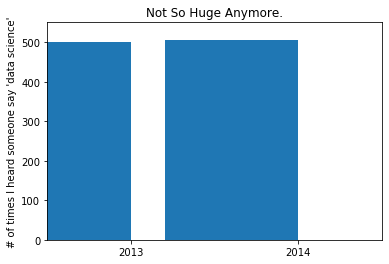

In [86]:
make_chart_misleading_y_axis()

### Multiple Line Graphs

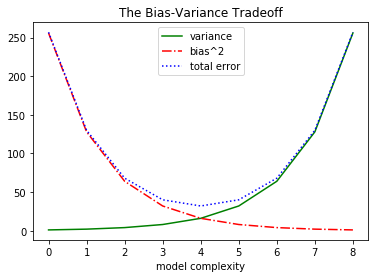

In [90]:
# Multiple Line Graphs
variance     = [1,2,4,8,16,32,64,128,256]
bias_squared = [256,128,64,32,16,8,4,2,1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]

xs = range(len(variance))

# we can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# because we've assigned labels to each series
# we can get a legend for free
# loc=9 means "top center"
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

### Scatterplots

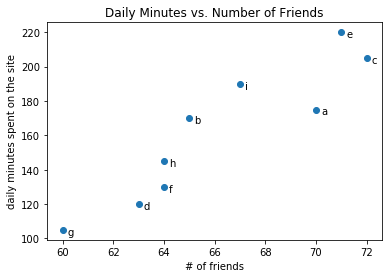

In [99]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                 xy=(friend_count, minute_count), # put the label with its point
                 xytext=(5, -5), # but slightly offset
                 textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

In [105]:
def make_chart_scatterplot_axes(equal_axes=False):

    test_1_grades = [ 99, 90, 85, 97, 80]
    test_2_grades = [100, 85, 60, 90, 70]

    plt.scatter(test_1_grades, test_2_grades)
    plt.xlabel("test 1 grade")
    plt.ylabel("test 2 grade")

    if equal_axes:
        plt.title("Axes Are Comparable")
        plt.axis("equal")
    else:
        plt.title("Axes Aren't Comparable")

    plt.show()

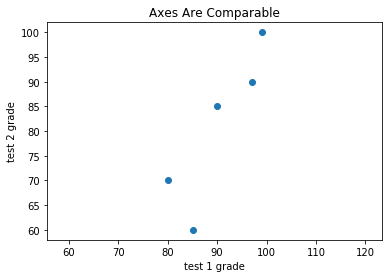

In [110]:
make_chart_scatterplot_axes(equal_axes=True)

### Linear Algebra - Vectors

In [1]:
import re, math, random # regexes, math functions, random numbers
import matplotlib.pyplot as plt # pyplot
from collections import defaultdict, Counter
from functools import partial, reduce

In [27]:
# Create example of height weight and age

h_w_a = [70, 170, 40]
grades = [95, 80, 75]

# Create a function for vector addition
def vector_add(v1, v2):
    "Adds component-wise elements"
    return [v_1 + v_2 for v_1, v_2 in zip(v1,v2)]

# Create a function for vector subtraction
def vector_subtract(v1, v2):
    "Adds component-wise elements"
    return [v_1 - v_2 for v_1, v_2 in zip(v1,v2)]

print('Adding vectors:', vector_add(h_w_a, grades))
print('Subtracting vectors:', vector_subtract(h_w_a, grades))

Adding vectors: [165, 250, 115]
Subtracting vectors: [-25, 90, -35]


In [28]:
# Component wise sum a list of vectors
# Create a new vector whose first element is the sum of all the first elements, whose second element is the sum of all second and so on...

def vector_sum(vectors):
    result = vectors[0]
    for vector in vectors[1:]:
        result = vector_add(result, vector)
    return result

def vector_sum(vectors):
    return reduce(vector_add, vectors)

print(vector_sum([h_w_a, grades, grades]))

[260, 330, 190]


In [29]:
# Vector multiplication with scalar
def scalar_multiply(c, v):
    '''c is a scalar and v is a vector'''
    return [element*c for element in v]

print(scalar_multiply(2,h_w_a))

# This allows us to compute componentwise means of a list of same-sized vectors
def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

print(vector_mean([h_w_a, grades]))

[140, 340, 80]
[82.5, 125.0, 57.5]


In [33]:
# Dot Product 
# dot(v,w) is length of the vector if you'd get if you projected v onto w
def dot(v,w):
    return sum(v1*w1 for v1, w1 in zip(v,w))

w = [3,4]
v = [5,12]

print(dot(v=v,w=w), end="")

# You can use the dot product to find the sum of squares
def sum_of_squares(v):
    '''v1*v1 + v2*v2 + ... + vn*vn'''
    return dot(v,v)

sum_of_squares(v=v)

63

169

In [38]:
# You can use sum of squares to find magnitude
# This is Pythagorean Theorem
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

magnitude(v)

13.0

In [35]:
# Now we can compute the distance between two vectors
# sqrt((v1 - w1)^2 + (v2 - w2)^2))

def squared_distance(v,w):
    return magnitude(vector_subtract(v,w))

squared_distance(v,w)

8.246211251235321

### Linear Algebra - Matrices

In [40]:
import numpy as np

In [51]:
# A has 2 rows and 3 columns
# B has 3 rows and 2 columns
a = [[1,2,3],
     [4,5,6]]

b = [[1,2],
     [3,4],
     [5,6]]

# Find the shape of your matrix
def shape(matrix):
    rows = len(matrix)
    col = len(matrix[0]) if a else 0
    return rows, col

shape(a)

(2, 3)

In [56]:
# If a matrix has n rows and k columns, then that is a NxK matrix
# each row has a vector of length K and each column as a vector of length N

def get_row(A, i):
    return(A[i])

print(get_row(a, 1))


def get_column(A, j):
    return [A_i[j] for A_i in A]

print(get_column(a, 1))

[4, 5, 6]
[2, 5]


In [58]:
# Make a matrix with specific rows and columns
def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix
    whose (i,j)-th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_cols)]
            for i in range(num_rows)]

def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0

identity_matrix = make_matrix(5, 5, is_diagonal)
identity_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

### Statistics

In [66]:
from collections import Counter
import math

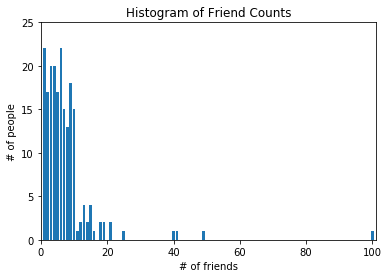

In [69]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15
               ,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10
               ,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9
               ,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7
               ,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6
               ,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
               ,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3
               ,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2
               ,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1
               ,1,1,1,1,1,1,1,1]


friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0,101,0,25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [70]:
# Descriptive Stats of histogram
num_points = len(num_friends)               # 204

largest_value = max(num_friends)            # 100
smallest_value = min(num_friends)           # 1

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]           # 1
second_smallest_value = sorted_values[1]    # 1
second_largest_value = sorted_values[-2]    # 49

In [87]:
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2

    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

In [88]:
# Quantile to give generalizations of median
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print(quantile(num_friends, 0.10))
print(quantile(num_friends, 0.25))
print(quantile(num_friends, 0.50))
print(quantile(num_friends, 0.90))

1
3
6
13


In [91]:
def mean(x):
    return sum(x) / len(x)

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

# sum of x - u divided by n-1
def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(x):
    return math.sqrt(variance(x))

def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

def data_range(x):
    return max(x) - min(x)

In [93]:
# Correlation

daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

outlier = num_friends.index(100) # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]



if __name__ == "__main__":

    print("num_points", len(num_friends))
    print("largest value", max(num_friends))
    print("smallest value", min(num_friends))
    print("second_smallest_value", sorted_values[1])
    print("second_largest_value", sorted_values[-2]  )
    print("mean(num_friends)", mean(num_friends))
    print("median(num_friends)", median(num_friends))
    print("quantile(num_friends, 0.10)", quantile(num_friends, 0.10))
    print("quantile(num_friends, 0.25)", quantile(num_friends, 0.25))
    print("quantile(num_friends, 0.75)", quantile(num_friends, 0.75))
    print("quantile(num_friends, 0.90)", quantile(num_friends, 0.90))
    print("mode(num_friends)", mode(num_friends))
    print("data_range(num_friends)", data_range(num_friends))
    print("variance(num_friends)", variance(num_friends))
    print("standard_deviation(num_friends)", standard_deviation(num_friends))
    print("interquartile_range(num_friends)", interquartile_range(num_friends))

    print("covariance(num_friends, daily_minutes)", covariance(num_friends, daily_minutes))
    print("correlation(num_friends, daily_minutes)", correlation(num_friends, daily_minutes))
    print("correlation(num_friends_good, daily_minutes_good)", correlation(num_friends_good, daily_minutes_good))

num_points 204
largest value 100
smallest value 1
second_smallest_value 1
second_largest_value 49
mean(num_friends) 7.333333333333333
median(num_friends) 6.0
quantile(num_friends, 0.10) 1
quantile(num_friends, 0.25) 3
quantile(num_friends, 0.75) 9
quantile(num_friends, 0.90) 13
mode(num_friends) [6, 1]
data_range(num_friends) 99
variance(num_friends) 81.54351395730716
standard_deviation(num_friends) 9.03014473623248
interquartile_range(num_friends) 6
covariance(num_friends, daily_minutes) 22.425435139573064
correlation(num_friends, daily_minutes) 0.24736957366478218
correlation(num_friends_good, daily_minutes_good) 0.5736792115665573


### Probability

In [99]:
from collections import Counter
import math, random

def random_kid():
    return random.choice(["boy", "girl"])

print(random_kid())

def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

def uniform_cdf(x):
    "returns the probability that a uniform random variable is less than x"
    if x < 0:   return 0    # uniform random is never less than 0
    elif x < 1: return x    # e.g. P(X < 0.4) = 0.4
    else:       return 1    # uniform random is always less than 1

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

def plot_normal_pdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend()
    plt.show()

def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def plot_normal_cdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=4) # bottom right
    plt.show()

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(p, n):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):

    data = [binomial(p, n) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.show()

girl


In [105]:
if __name__ == "__main__":

    #
    # CONDITIONAL PROBABILITY
    #

    both_girls = 0
    older_girl = 0
    either_girl = 0

    random.seed(0)
    for _ in range(10000):
        younger = random_kid()
        older = random_kid()
        if older == "girl":
            older_girl += 1
        if older == "girl" and younger == "girl":
            both_girls += 1
        if older == "girl" or younger == "girl":
            either_girl += 1

    print("P(both | older):", both_girls / older_girl)      # 0.514 ~ 1/2
    print("P(both | either): ", both_girls / either_girl)   # 0.342 ~ 1/3
    print('both girls', both_girls)
    print('older girls', older_girl)
    print('either girls', either_girl)

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325
both girls 2472
older girls 4937
either girls 7464


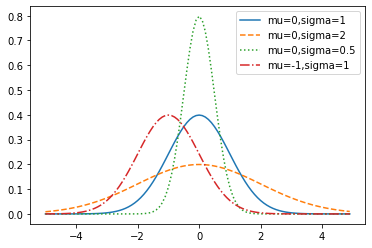

In [107]:
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend()
    plt.show()

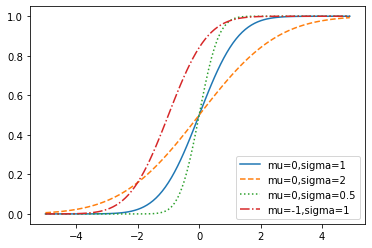

In [106]:
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=4) # bottom right
    plt.show()

In [112]:
inverse_normal_cdf(p=0.7, mu=0, sigma=1, tolerance=0.00001)

0.5243968963623047

### Hypothesis Testing and Inference